In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df_copy = df.copy()

In [5]:
df = df_copy[['Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea','Price']].copy()

In [6]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
0,2,1.0,0.0,156.0,79.0,1035000.0
1,3,2.0,0.0,134.0,150.0,1465000.0
2,4,1.0,2.0,120.0,142.0,1600000.0
3,3,2.0,0.0,245.0,210.0,1876000.0
4,2,1.0,2.0,256.0,107.0,1636000.0


In [7]:
df = df[(df['BuildingArea']>0)&(df['BuildingArea']<1000)]

In [8]:
df = df[(df['Landsize']>0)&(df['Landsize']<2000)]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Price', axis=1), df['Price'], test_size=0.15, random_state=13
)

In [10]:
from sklearn.linear_model import LinearRegression

simple_linear_reg_model = LinearRegression(positive=True).fit(X = X_train,y =  y_train)

In [11]:
simple_linear_reg_model.score(X=X_train,y=y_train)

0.31199327392607923

In [12]:
simple_linear_reg_model.score(X=X_test,y=y_test)

0.26264375375094473

In [13]:
cdf = pd.DataFrame(simple_linear_reg_model.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
Rooms,106636.294887
Bathroom,173211.000457
Car,0.000000
Landsize,137.267788
BuildingArea,2514.199054


In [14]:
simple_linear_reg_model.intercept_

83749.17547229957

Metrics: Root Mean Squared Log Error

In [15]:
y_pred_linear_model = simple_linear_reg_model.predict(X_test)

In [16]:
RMSLE_linear_model = root_mean_squared_log_error(y_true=y_test, y_pred=y_pred_linear_model)
print(RMSLE_linear_model)

0.4439832369211725


-----------------------------------------------

Model Evaluation Excercise

In [17]:
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
object_pipline = Pipeline(
    steps=[
        (
            'encode', OneHotEncoder()
        )
    ]
)

In [23]:
transformer = ColumnTransformer([
    ('categorical preprocessing', object_pipline, ['smoker', 'day', 'time'])
])

In [24]:
pipe = make_pipeline(transformer, LinearRegression())

In [25]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical preprocessing',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['smoker', 'day', 'time'])])),
                ('linearregression', LinearRegression())])

In [27]:
X=df_tips[['total_bill', 'smoker', 'day', 'time', 'size']]
y=df_tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, train_size=0.2)

In [29]:
LinearRegModel = pipe.fit(
    X=X_train,
    y=y_train
)

Residual Analysis

In [30]:
y_pred = LinearRegModel.predict(X=X_test)
print(y_pred)

[2.41589318 2.47176303 3.         2.47176303 2.47176303 3.07116671
 3.07116671 2.47176303 2.99       2.98845735 3.07116671 2.98845735
 2.47176303 2.98845735 3.07116671 2.41589318 2.42589318 2.47176303
 2.41589318 2.99       2.47176303 2.9325875  2.41589318 2.98845735
 2.98845735 3.         2.98845735 2.47176303 3.58786103 3.07116671
 2.47176303 3.07116671 2.99       2.47176303 2.41589318 2.41589318
 2.9325875  2.41589318 3.58786103 2.47176303 3.58786103 3.07116671
 2.41589318 3.07116671 3.         3.58786103 2.98845735 3.07116671
 3.07116671 2.98845735 2.47176303 2.98845735 3.07116671 2.47176303
 2.47176303 2.41589318 2.98845735 3.07116671 2.9325875  2.41589318
 3.07116671 2.47176303 2.9325875  3.07116671 3.07116671 3.
 3.07116671 2.47176303 3.07116671 2.47176303 3.58786103 2.98845735
 2.47176303 3.         2.41589318 3.         3.58786103 3.07116671
 2.98845735 3.07116671 2.41589318 2.98845735 2.47176303 2.99
 3.07116671 2.98845735 3.07116671 2.98845735 3.58786103 2.41589318
 2.471763

In [32]:
df_tips_comparison = pd.DataFrame(data=[y_test.values, y_pred], index=['y_test', 'y_pred']).transpose()
df_tips_comparison

,y_test,y_pred
0,1.50,2.415893
1,2.47,2.471763
2,4.30,3.000000
3,1.45,2.471763
4,7.58,2.471763
...,...,...
191,2.00,3.071167
192,2.00,2.415893
193,1.25,2.415893
194,3.00,2.471763


In [33]:
df_tips_comparison['residual'] = df_tips_comparison['y_test'] - df_tips_comparison['y_pred']
df_tips_comparison

,y_test,y_pred,residual
0,1.50,2.415893,-0.915893
1,2.47,2.471763,-0.001763
2,4.30,3.000000,1.300000
3,1.45,2.471763,-1.021763
4,7.58,2.471763,5.108237
...,...,...,...
191,2.00,3.071167,-1.071167
192,2.00,2.415893,-0.415893
193,1.25,2.415893,-1.165893
194,3.00,2.471763,0.528237


In [35]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

2.0844904650766787


<Axes: >

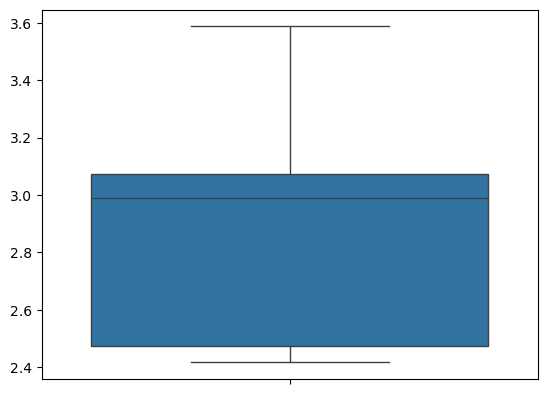

In [38]:
sns.boxplot(
    data = y_pred
)

<Axes: ylabel='tip'>

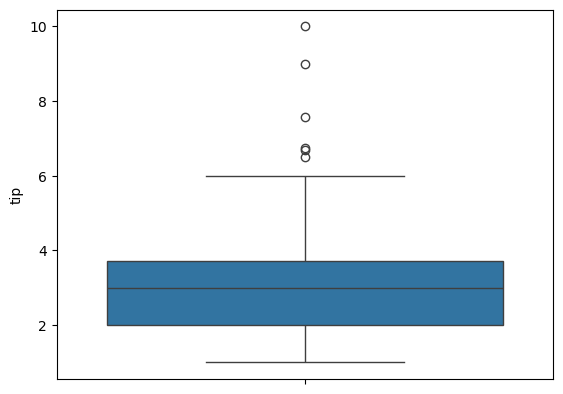

In [39]:
sns.boxplot(
    data = y_test
)

<Axes: ylabel='residual'>

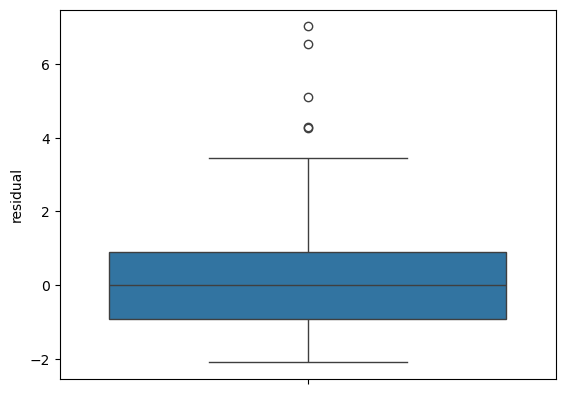

In [40]:
sns.boxplot(
    data = df_tips_comparison['residual']
)

In [41]:
print(mean_absolute_percentage_error(y_true = y_test, y_pred=y_pred))

0.38615806650695933
